In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

In [2]:
iris = datasets.load_iris()
features = iris.data
target = iris.target

sepal_length = np.array(features[:,0])
petal_width = np.array(features[:,3])

species_map = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
species_names = [species_map[i] for i in target]

In [3]:
def predict(intercept, coefficient, x):
  return intercept + coefficient * x

In [4]:
# def adagrad(x, y, df, epochs = 1000, learning_rate = 0.01):
#     intercept = 0
#     coefficient = 0
#     eps = 1e-8
#     intercept_history = []
#     coefficient_history = []
#     for epoch in range(epochs):
#         intercept_gradient = 0
#         coefficient_gradient = 0
#         for i in range(len(x)):
#             prediction = predict(intercept, coefficient, x[i])
#             error = prediction - y[i]
#             intercept_gradient += error
#             coefficient_gradient += error * x[i]
#             intercept += -learning_rate * intercept_gradient / np.sqrt(eps + np.sum(intercept_gradient ** 2))
#             coefficient += -learning_rate * coefficient_gradient / np.sqrt(eps + np.sum(coefficient_gradient ** 2))
#             intercept_history.append(intercept)
#             coefficient_history.append(coefficient)
#     return intercept, coefficient, intercept_history, coefficient_history

In [5]:
def adagrad(x, y, df, epochs = 100, learning_rate = 0.01):
    intercept, coefficient = -0.5, -0.75
    eps = 1e-8
    
    for epoch in range(0, epochs):
        intercept_gradient, coefficient_gradient = 0, 0
        random_index = np.random.randint(len(features))
        prediction = predict(intercept, coefficient, x[random_index])
        error = prediction - y[random_index]
        intercept_gradient += error
        coefficient_gradient += error * x[random_index]
        intercept += -learning_rate * intercept_gradient / np.sqrt(eps + np.sum(intercept_gradient ** 2))
        coefficient += -learning_rate * coefficient_gradient / np.sqrt(eps + np.sum(coefficient_gradient ** 2))

        df.loc[epoch] = [intercept, coefficient, error**2]

    return df

In [6]:
adagrad_columns = ['intercept', 'coefficient', 'error']
adagrad_loss_df = pd.DataFrame(columns=adagrad_columns)
adagrad_loss_df = adagrad(sepal_length, petal_width, adagrad_loss_df)

In [7]:
adagrad_loss_df.head()

,intercept,coefficient,error
0,-0.49,-0.74,-6.075
1,-0.48,-0.73,-7.622
2,-0.47,-0.72,-6.879
3,-0.46,-0.71,-8.314
4,-0.45,-0.70,-4.494


In [8]:
adagrad_loss_df.tail()

,intercept,coefficient,error
95,0.36,0.11,-0.370
96,0.37,0.12,-1.447
97,0.36,0.11,0.818
98,0.35,0.10,0.666
99,0.34,0.09,0.690


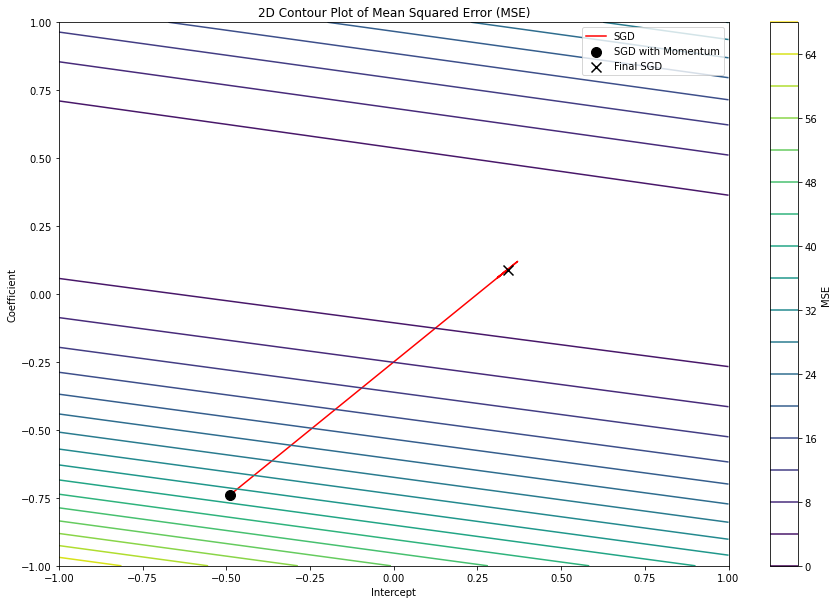

In [9]:
intercept_range = np.linspace(-1.0 , 1.0, 150)
coefficient_range = np.linspace(-1.0, 1.0, 150)
intercept_grid, coefficient_grid = np.meshgrid(intercept_range, coefficient_range)

mse_grid = np.zeros_like(intercept_grid)

for i in range(len(intercept_range)):
    for j in range(len(coefficient_range)):
        # Get current intercept and coefficient values
        intercept = intercept_grid[i, j]
        coefficient = coefficient_grid[i, j]
        
        # Calculate predicted values using the current intercept and coefficient
        y_pred = intercept + coefficient * sepal_length.squeeze()
        
        # Calculate MSE (Mean Squared Error)
        mse = np.mean((y_pred - petal_width)**2)
        
        # Store MSE in the corresponding grid position
        mse_grid[i, j] = mse

plt.figure(figsize=(15, 10))
contour = plt.contour(intercept_grid, coefficient_grid, mse_grid, levels=20, cmap='viridis')
plt.colorbar(contour, label='MSE')
plt.plot(adagrad_loss_df['intercept'], adagrad_loss_df['coefficient'], color='r', zorder=1)
plt.scatter(adagrad_loss_df.loc[0, 'intercept'], adagrad_loss_df.loc[0, 'coefficient'], color='black', marker='o', s=100, zorder=2)
plt.scatter(adagrad_loss_df.loc[len(adagrad_loss_df)-1, 'intercept'], adagrad_loss_df.loc[len(adagrad_loss_df)-1, 'coefficient'], color='black', marker='x', s=100, zorder=2)
plt.xlabel('Intercept')
plt.ylabel('Coefficient')
plt.title('2D Contour Plot of Mean Squared Error (MSE)')
plt.legend(['SGD', 'SGD with Momentum', 'Final SGD', 'Final SGD with Momentum'])
plt.show()